In [8]:
from langgraph.graph import StateGraph,START ,END
from typing import TypedDict

In [19]:
#Defining a State

class BMIState(TypedDict):
    weight: float
    height: float
    bmi: float
    category:str
    

In [10]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight=state['weight']
    height=state['height']
    bmi=weight/(height**2)
    state['bmi'] = round(bmi,2)

    return state

In [22]:
def label_bmi(state:BMIState) -> BMIState:
    bmi=state['bmi']
    if bmi<18.5:
        state['category']='Underweight'
    elif bmi<25:
        state['category']='Normal weight'
    elif bmi<30:
        state['category']='Overweight'
    else:
        state['category']='Obesity'
    return state

In [23]:
#Defining a Simple Graph

graph=StateGraph(BMIState)

# Adding a node in the graph
graph.add_node("Calculate BMI", calculate_bmi)
graph.add_node("Label BMI",label_bmi)

# Adding a edges in the graph
graph.add_edge(START,'Calculate BMI')
graph.add_edge('Calculate BMI','Label BMI')
graph.add_edge('Label BMI',END)


# Compling the graph
workflow=graph.compile()


In [24]:
# Executing the graph
initial_state={
    'weight':70,
    'height':1.75
}

In [25]:
output=workflow.invoke(initial_state)

In [26]:
print(output)

{'weight': 70, 'height': 1.75, 'bmi': 22.86, 'category': 'Normal weight'}


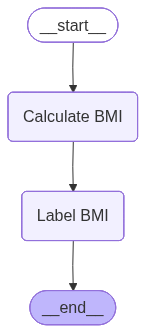

In [27]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())